#RAG QA using Llama2

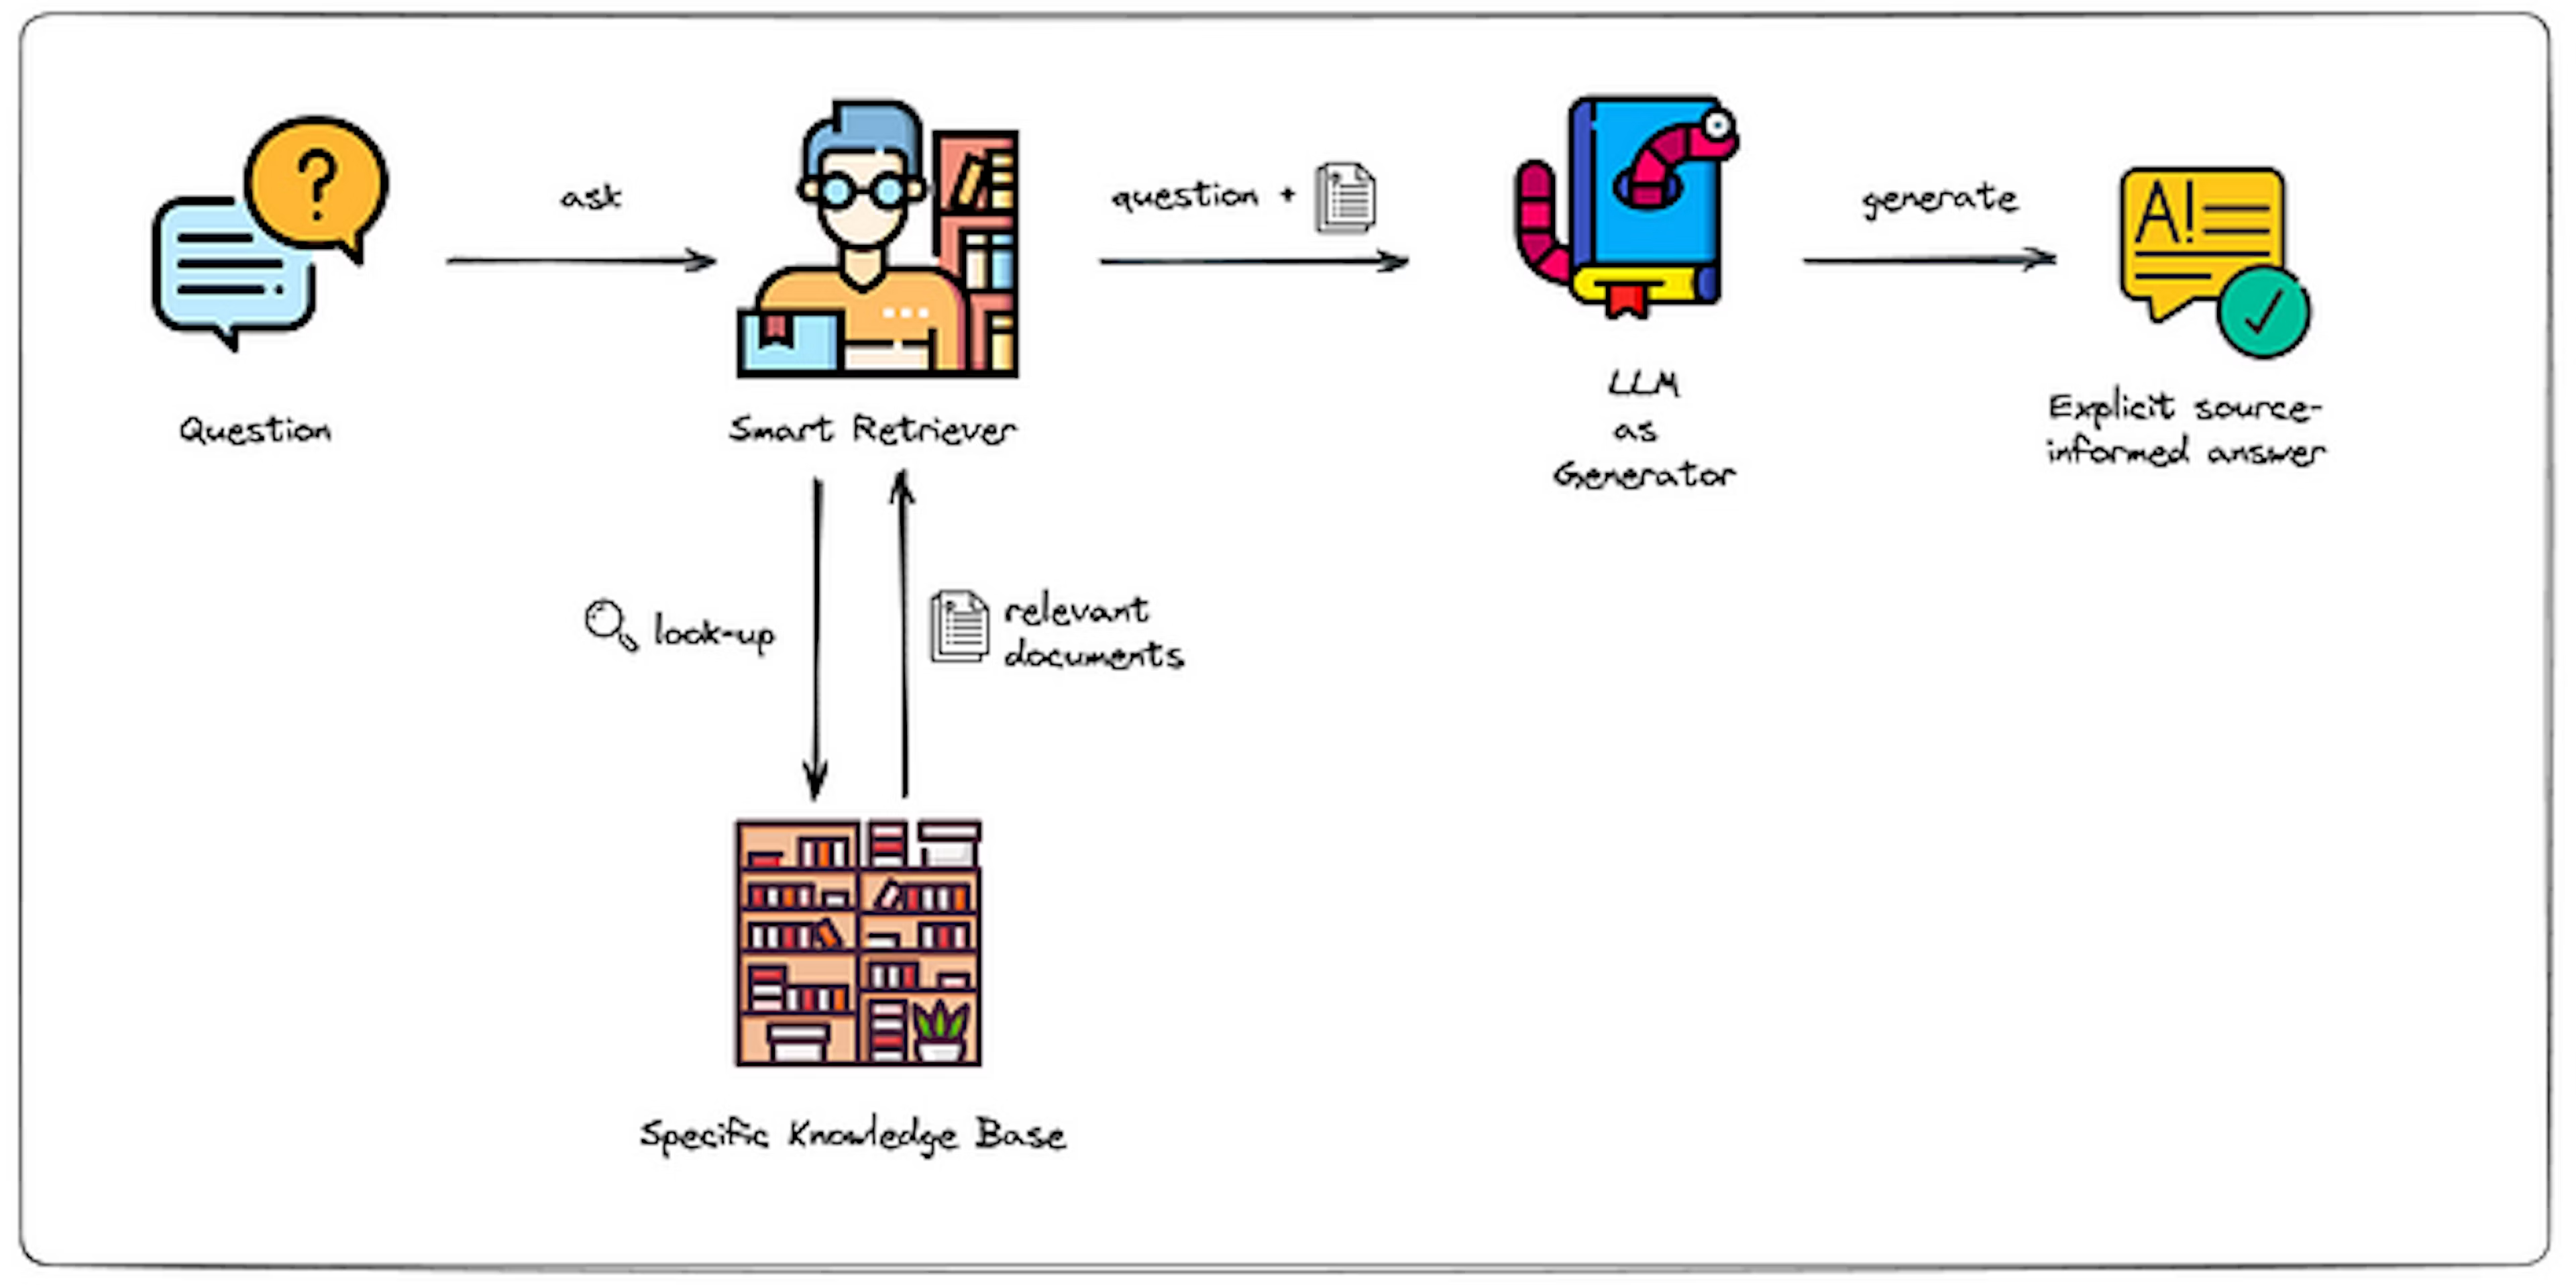

##Installation

In [1]:
!pip install langchain llama-index llama_hub -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━

In [2]:
!pip install accelerate -U -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 9.7 MB/s eta 0:00:00


In [3]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00


In [4]:
!pip install bitsandbytes -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 6.1 MB/s eta 0:00:00


In [5]:
!pip install chromadb -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 12.9 MB/s eta 0:00:

In [6]:
!pip install sentence-transformers -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 6.1 MB/s eta 0:00:00


In [7]:
!pip install langchain-community -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.6 MB/s eta 0:00:00


## Imports

In [8]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain import LLMChain
from langchain.prompts.prompt import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
import torch
from transformers import BitsAndBytesConfig
from langchain_community.document_loaders import PyPDFDirectoryLoader
import textwrap

In [9]:
from langchain.document_transformers import LongContextReorder
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

## Model

1) meta-llama/Llama-2-7b-chat-hf

2) NousResearch/Llama-2-7b-chat-hf

In [10]:
name = "NousResearch/Llama-2-7b-chat-hf"

##Tokenization and Model Initialization

In [11]:
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_quant_type="nf4",
                                         bnb_4bit_use_double_quant=True,
                                         bnb_4bit_compute_dtype=torch.bfloat16)

In [12]:
tokenizer = AutoTokenizer.from_pretrained(name,cache_dir="./model/")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [13]:
model = AutoModelForCausalLM.from_pretrained(name,
                                             cache_dir="./model/",
                                             device_map = "auto",
                                             torch_dtype=torch.float16,
                                             quantization_config=quantization_config
                                             )

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

##Pipeline

In [14]:
pipe = pipeline("text-generation",
                model = model,
                tokenizer = tokenizer,
                max_new_tokens=512,
                temperature=0.4,
                top_p=0.95,
                repetition_penalty=1.15)

In [15]:
llm = HuggingFacePipeline(pipeline=pipe)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [16]:
print(llm.invoke("What is rainbow?"))

What is rainbow? Rainbows are beautiful natural phenomena that occur when sunlight passes through water droplets in the air. nobody knows for sure, but it's believed to be a combination of the way light behaves and our brains interpretation of what we see. The colors of the rainbow typically appear in the following order: red, orange, yellow, green, blue, indigo, and violet.
Rainbows are caused by refraction of sunlight as it passes through water droplets in the atmosphere. When sunlight enters a drop of water at an angle, it is refracted or bent, and split into its individual colors. These colors bend at different angles depending on their wavelength, resulting in the banding of colors we see in a rainbow.
The colors of the rainbow always appear in the same order because they have specific wavelengths, which correspond to the different colors we see. Red light has the longest wavelength, while violet light has the shortest wavelength. So, when sunlight passes through water droplets, t

## Prompt Template

In [34]:
context_prompt = ChatPromptTemplate.from_messages([
    ('system',
        """You are an AI language model specialized in providing accurate and concise answers.
        When responding to the user's question, use only the information provided in the context.
        Ensure that your response is complete and ends with appropriate punctuation, such as a period or other sentence-ending
        punctuation.
        """
        "\n\nQuestion: {question}\n\nContext: {context}"
    ),
    ('user', "{question}"),
])


##Chunking

In [35]:
docs = ("data/")

In [36]:
loader = PyPDFDirectoryLoader(docs)

In [37]:
docs= loader.load()

In [38]:
if docs:
    print(type(docs[0]))
    print(docs[0])  # This will show the structure of the first item


<class 'langchain_core.documents.base.Document'>
page_content='FinTextQA : A Dataset for Long-form Financial Question Answering
Jian Chen1 2Peilin Zhou2Yining Hua3
Yingxin Loh1Kehui Chen1Ziyuan Li1Bing Zhu1*Junwei Liang2∗
1HSBC Lab2Hong Kong University of Science and Technology (Guangzhou)
3Harvard University
{alex.j.chen, bing1.zhu}@hsbc.com,
jchen524@connect.hkust-gz.edu.cn, junweiliang@hkust-gz.edu.cn
Abstract
Accurate evaluation of financial question-
answering (QA) systems necessitates a compre-
hensive dataset encompassing diverse question
types and contexts. However, current financial
QA datasets lack scope diversity and question
complexity. This work introduces FinTextQA ,
a novel dataset for long-form question answer-
ing (LFQA) in finance. FinTextQA comprises
1,262 high-quality, source-attributed QA pairs
extracted and selected from finance textbooks
and government agency websites.Moreover, we
developed a Retrieval-Augmented Generation
(RAG)-based LFQA system, comprising an
e

In [39]:
for doc in docs:
    print(doc)  # This will print each string in the docs list


page_content='FinTextQA : A Dataset for Long-form Financial Question Answering
Jian Chen1 2Peilin Zhou2Yining Hua3
Yingxin Loh1Kehui Chen1Ziyuan Li1Bing Zhu1*Junwei Liang2∗
1HSBC Lab2Hong Kong University of Science and Technology (Guangzhou)
3Harvard University
{alex.j.chen, bing1.zhu}@hsbc.com,
jchen524@connect.hkust-gz.edu.cn, junweiliang@hkust-gz.edu.cn
Abstract
Accurate evaluation of financial question-
answering (QA) systems necessitates a compre-
hensive dataset encompassing diverse question
types and contexts. However, current financial
QA datasets lack scope diversity and question
complexity. This work introduces FinTextQA ,
a novel dataset for long-form question answer-
ing (LFQA) in finance. FinTextQA comprises
1,262 high-quality, source-attributed QA pairs
extracted and selected from finance textbooks
and government agency websites.Moreover, we
developed a Retrieval-Augmented Generation
(RAG)-based LFQA system, comprising an
embedder, retriever, reranker, and generator.
A mu

In [40]:
# Split the document into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=10)
chunks = text_splitter.split_documents(docs)  # Pass a list of Document objects

## Embeddings and VectorStore

In [41]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"

In [42]:
embeddings = HuggingFaceEmbeddings(model_name=embedding_model)

In [43]:
print("Number of chunks:", len(chunks))
if not chunks:
    print("Warning: The 'chunks' list is empty. Check your text splitting process.")

Number of chunks: 908


In [44]:
vectorsdb = Chroma.from_documents(chunks, embeddings, persist_directory="database")

Test VectorDB

In [45]:
print(vectorsdb.as_retriever().get_relevant_documents("What is RAG?"))

[Document(metadata={'page': 2, 'source': 'data/test dataset.pdf'}, page_content='stages: Naive RAG, Advanced RAG, and Modu-\nlar RAG. Naive RAG offers improvements over'), Document(metadata={'page': 2, 'source': 'data/test dataset.pdf'}, page_content='stages: Naive RAG, Advanced RAG, and Modu-\nlar RAG. Naive RAG offers improvements over'), Document(metadata={'page': 8, 'source': 'data/test dataset.pdf'}, page_content='Ivan Ilin. 2023. Advanced rag techniques: an illustrated\noverview.'), Document(metadata={'page': 8, 'source': 'data/test dataset.pdf'}, page_content='Ivan Ilin. 2023. Advanced rag techniques: an illustrated\noverview.')]


## Create Chain

In [58]:
chain = (
         {
             'context' : vectorsdb.as_retriever(),
             'question' : (lambda x:x)
         }
         | context_prompt
         | llm
         | StrOutputParser()
)

## Output

In [59]:
def output(query):
    result = chain.invoke(query)
    if isinstance(result, dict) and 'text' in result:
        return result['text'].strip()
    elif isinstance(result, str):
        return result.strip()
    else:
        return "No answer found."

In [57]:
print(output("What is RAG"))

System: You are an AI language model specialized in providing accurate and concise answers. 
        When responding to the user's question, use only the information provided in the context. 
        Ensure that your response is complete and ends with appropriate punctuation, such as a period or other sentence-ending
        punctuation. 
        

Question: What is RAG

Context: [Document(metadata={'page': 2, 'source': 'data/test dataset.pdf'}, page_content='stages: Naive RAG, Advanced RAG, and Modu-\nlar RAG. Naive RAG offers improvements over'), Document(metadata={'page': 2, 'source': 'data/test dataset.pdf'}, page_content='stages: Naive RAG, Advanced RAG, and Modu-\nlar RAG. Naive RAG offers improvements over'), Document(metadata={'page': 8, 'source': 'data/test dataset.pdf'}, page_content='Ivan Ilin. 2023. Advanced rag techniques: an illustrated\noverview.'), Document(metadata={'page': 8, 'source': 'data/test dataset.pdf'}, page_content='Ivan Ilin. 2023. Advanced rag techniques: a

In [ ]:
# %%writefile app.py
# import streamlit as st

# st.title("Hello, everyone!")
# st.write("This is DocuQuery - AI Assistant for Intelligent Document Analysis!")

# # Streamlit app layout
# st.markdown("# DocuQuery App")

# def output(query):
#   result = chain.invoke(query)
#   return result
# # Creating layout similar to the gr.Blocks structure
# col1, col2 = st.columns(2)

# with col1:
#     query = st.text_input("Enter your query here")
#     submit = st.button("Submit")

# with col2:
#     if submit:
#         result = output(query)
#         st.text_area("Result", value=result, height=150)


In [ ]:
# %%writefile app.py
# import streamlit as st
# from transformers import pipeline
# import time

# # Load your model (with caching to improve performance)
# @st.cache_resource()
# def load_model():
#     model = AutoModelForCausalLM.from_pretrained(name,
#                                              cache_dir="./model/",
#                                              device_map = "auto",
#                                              torch_dtype=torch.float16,
#                                              quantization_config=quantization_config
#                                              )
#     pipe = pipeline("text-generation",
#                 model = model,
#                 tokenizer = tokenizer,
#                 max_new_tokens=512,
#                 temperature=0.4,
#                 top_p=0.95,
#                 repetition_penalty=1.15)
#     return model

# model = load_model()

# # Set up your web app
# st.title('DocuQuery')
# st.header('Enter question:')

# user_input = st.text_area('Ask something to activate the AI:', height=200)
# max_length = st.slider("Select max story length:", min_value=50, max_value=200, value=100, step=10)
# num_sequences = st.selectbox("Select number of stories to generate:", options=[1, 2, 3], index=0)

# if st.button('Generate Story'):
#     with st.spinner('Generating Story...'):
#         response = model(user_input, max_length=max_length, num_return_sequences=num_sequences)
#         for i, summary in enumerate(response):
#             st.write(f'**Story {i+1}:**')
#             st.write(summary['generated_text'])
#             st.markdown("---")

# st.sidebar.markdown("## Guide")
# st.sidebar.info("This tool uses Llama-2 to generate an answer to your provided text. The model is optimized for short to medium length paragraphs.")
# st.sidebar.markdown("### Examples")


In [ ]:
# !npm install localtunnel

In [ ]:
# import urllib
# print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

In [ ]:
# from pyngrok import ngrok

# # Run the Streamlit app
# !streamlit run app.py &>/content/logs.txt &

# # Create a tunnel to the Streamlit app
# !npx localtunnel --port 8501

#Gradio

##Install

In [51]:
!pip install gradio -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.8 MB/s eta 0:00:00


##Import

In [52]:
import gradio as gr

## Initialize Gradio

In [60]:
with gr.Blocks() as demo:
  gr.Markdown("DocuQuery")
  with gr.Row():
    with gr.Column():
      query = gr.Textbox(label="Enter your query here")
      submit = gr.Button("Submit")
    with gr.Column():
      result = gr.Textbox(label="Result")
  with gr.Row():
    submit.click(fn=output, inputs=[query], outputs=result)

##Launch

In [ ]:
demo.launch(debug=True) # set debug=True to deploy

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ab35114371f3a6d07a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
